In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_quality.csv')
print(df.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [2]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [3]:
y = df['quality']
features = df.drop(columns = ['quality'])


In [4]:
## 1. Data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [5]:
## 2. Train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [6]:
## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression

clf_no_reg = LogisticRegression(penalty='none')
clf_no_reg.fit(x_train, y_train)

c:\Users\matth\anaconda3\envs\tryba-env\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

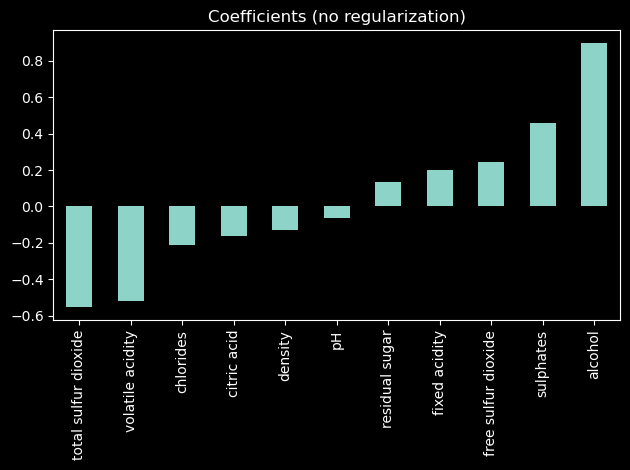

In [7]:
## 4. Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()

In [8]:
## 5. Training and test performance
from sklearn.metrics import f1_score

y_pred_test = clf_no_reg.predict(x_test)
y_pred_train = clf_no_reg.predict(x_train)

print('Testing Score:', f1_score(y_test, y_pred_test))
print('Training Score:', f1_score(y_train, y_pred_train))

Testing Score: 0.7266666666666667
Training Score: 0.7727598566308242


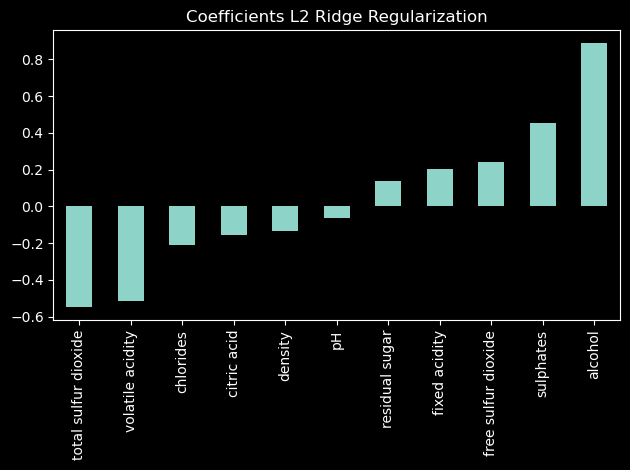

In [9]:
## 6. Default Implementation (L2-regularized!)
clf_default = LogisticRegression()
clf_default.fit(x_train, y_train)

predictors = features.columns
coefficients = clf_default.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients L2 Ridge Regularization')
plt.tight_layout()
plt.show()


In [10]:
## 7. Ridge Scores

y_pred_test = clf_default.predict(x_test)
y_pred_train = clf_default.predict(x_train)

print('Testing Score:', f1_score(y_test, y_pred_test))
print('Training Score:', f1_score(y_train, y_pred_train))

Testing Score: 0.7266666666666667
Training Score: 0.7727598566308242


In [11]:
## 8. Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]

for n in C_array:
    
    # create model with different values of C
    clf = LogisticRegression(C=n)
    
    # fit model
    clf.fit(x_train, y_train)
    
    # predict values
    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)

    # append scores to lists
    training_array.append(f1_score(y_train, y_pred_train))
    test_array.append(f1_score(y_test, y_pred_test))


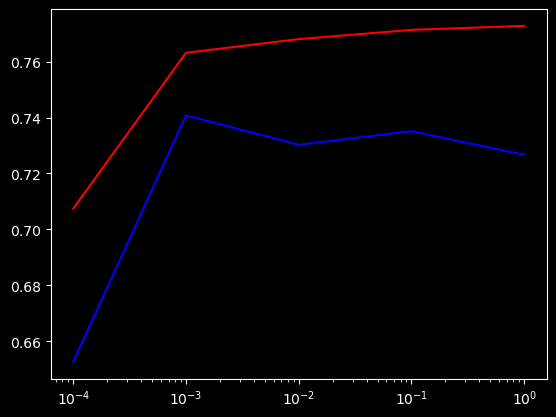

<Figure size 640x480 with 0 Axes>

In [12]:
## 9. Plot training and test scores as a function of C
plt.plot(C_array,training_array, color = 'red')
plt.plot(C_array,test_array, color = 'blue')
plt.xscale('log')
plt.show()
plt.clf()

In [13]:
## 10. Making a parameter grid for GridSearchCV

# make array of C values between 0.0001 and 0.01, this seems to be the rough optimal range from the above graph
C_array = np.logspace(-4, -2, 100)

# dict of C values to input in param_grid
tuning_C = {'C': C_array}

In [25]:
## 11. Implementing GridSearchCV with l2 penalty
from sklearn.model_selection import GridSearchCV

# create regression model
gs_model = LogisticRegression(penalty= 'l2', random_state= 42, max_iter= 10000)

# create grid search model
gs = GridSearchCV(gs_model,
                  param_grid=tuning_C,
                  scoring='f1',
                  cv = 5)

# fit grid search to data
gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': array([0.0001    , 0.00010476, 0.00010975, 0.00011498, 0.00012045,
       0.00012619, 0.00013219, 0.00013849, 0.00014508, 0.00015199,
       0.00015923, 0.00016681, 0.00017475, 0.00018307, 0.00019179,
       0.00020092, 0.00021049, 0.00022051, 0.00023101, 0.00024201,
       0.00025354, 0.00026561, 0.00027826...
       0.00205651, 0.00215443, 0.00225702, 0.00236449, 0.00247708,
       0.00259502, 0.00271859, 0.00284804, 0.00298365, 0.00312572,
       0.00327455, 0.00343047, 0.00359381, 0.00376494, 0.00394421,
       0.00413201, 0.00432876, 0.00453488, 0.00475081, 0.00497702,
       0.00521401, 0.00546228, 0.00572237, 0.00599484, 0.00628029,
       0.00657933, 0.00689261, 0.00722081, 0.00756463, 0.00792483,
       0.00830218, 0.00869749, 0.00911163, 0.00954548, 0.01      ])},
             scoring='f1')

In [26]:
## 12. Optimal C value and the score corresponding to it

print('Best C Value:', gs.best_params_)
print('Best C Score:', gs.best_score_)

Best C Value: {'C': 0.0019630406500402726}
Best C Score: 0.7723336222647887


In [28]:
## 13. Validating the "best classifier"

clf_best_ridge = LogisticRegression(C = gs.best_params_['C'])

# fit model
clf_best_ridge.fit(x_train, y_train)

# get scores and print

y_pred_test = clf_best_ridge.predict(x_test)
y_pred_train = clf_best_ridge.predict(x_train)

print('Testing Score:', f1_score(y_test, y_pred_test))
print('Training Score:', f1_score(y_train, y_pred_train))

Testing Score: 0.7407407407407408
Training Score: 0.7693360711841205


In [31]:
## 14. Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV

clf_l1 = LogisticRegressionCV(Cs = np.logspace(-2,2, 100),
                              penalty='l1',
                              scoring='f1',
                              cv = 5,
                              solver='liblinear')

clf_l1.fit(X,y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

In [33]:
## 15. Optimal C value and corresponding coefficients

print('Optimal C:', clf_l1.C_)
print('Coefficients:', clf_l1.coef_)

Optimal C: [0.25950242]
Coefficients: [[ 0.11642251 -0.55635179 -0.17267012  0.03123329 -0.17328756  0.20054803
  -0.50586487  0.         -0.07042873  0.43224915  0.94102048]]


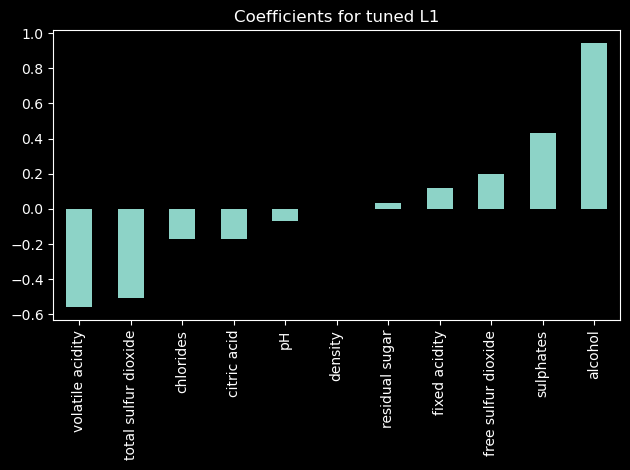

<Figure size 640x480 with 0 Axes>

In [35]:
## 16. Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()

#plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()
